In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../ks-projects-201801/ks-projects-201801.csv")

In [3]:
#df = df.drop(df.index[20000:])

In [4]:
df1 = pd.get_dummies(df['state'])
df2 = pd.merge(df, df1, left_index=True, right_index=True)

In [5]:
df2.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended,undefined
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,0.102411,0.522153,0.007392,0.353762,0.004875,0.009407
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,0.303188,0.499510,0.085658,0.478137,0.069651,0.096532
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df2 = df2.drop("canceled", axis=1)
df2 = df2.drop("failed", axis=1)
df2 = df2.drop("live",  axis=1)
df2 = df2.drop("suspended",  axis=1)
df2 = df2.drop("undefined",  axis=1)
df2 = df2.drop("name", axis=1)
df2 = df2.drop("category", axis=1)
df2 = df2.drop("main_category", axis=1)
df2 = df2.drop("currency", axis=1)
df2 = df2.drop("deadline", axis=1)
df2 = df2.drop("launched", axis=1)
df2 = df2.drop("state", axis=1)
df2 = df2.drop("country", axis=1)

In [7]:
df2.isnull().sum()

ID                     0
goal                   0
pledged                0
backers                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
successful             0
dtype: int64

In [8]:
df2 = df2.fillna(0)

In [9]:
df2.isnull().sum()

ID                  0
goal                0
pledged             0
backers             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
successful          0
dtype: int64

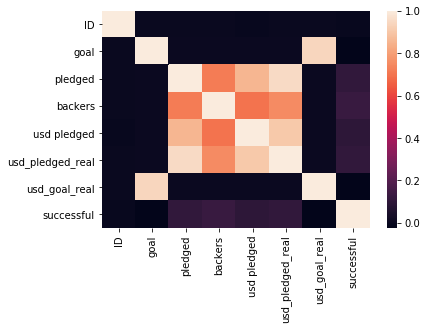

In [10]:
sns.heatmap(df2.corr())
plt.show()

In [11]:
# ロジスティック回帰
y = df2["successful"].values
X = df2[["backers"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 83.969%
適合率（Precision） = 89.812%
再現率（Recall） = 84.814%
F1値（F1-score） = 87.241%


In [13]:
x = df2[["backers"]].values
X = x.reshape(-1,1) # scikit-learnに入力するために整形
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.45

Fold 2
MAE = 0.451

Fold 3
MAE = 0.451

Fold 4
MAE = 0.45

Fold 5
MAE = 0.451

Cross Validation MAE = 0.451


In [14]:
df3 = df2.drop(df2.index[100:])

In [15]:
df3.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,successful
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.272811e+08,19796.710000,9134.102600,125.130000,7754.993100,9354.592000,19726.169400,0.420000
std,2.486553e+08,37117.042835,20203.825442,325.564022,17766.627521,21418.768917,37012.836925,0.496045
min,1.000365e+07,100.000000,0.000000,0.000000,0.000000,0.000000,65.550000,0.000000
25%,1.000072e+09,2875.000000,89.500000,3.000000,78.500000,96.575000,2894.837500,0.000000
50%,1.000184e+09,7500.000000,1116.000000,24.500000,771.910000,1116.000000,7608.205000,0.000000
75%,1.000271e+09,15689.250000,8335.085000,96.250000,8176.007500,8335.085000,15857.192500,1.000000
max,1.000399e+09,250000.000000,124998.000000,2784.000000,124998.000000,124998.000000,250000.000000,1.000000


In [16]:
y = df3["successful"].values
X = df3[["backers"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# SVMの実行
C = 10
clf = SVC(C=C,kernel="linear")
clf.fit(X_train, y_train)

# 未知のデータを識別する
y_pred = clf.predict(X_test)

D:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# 正答率を計算
accuracy =  accuracy_score(y_test, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 76.667%
適合率（Precision） = 73.684%
再現率（Recall） = 87.500%
F1値（F1-score） = 80.000%


score= 0.8714285714285714
[1.]


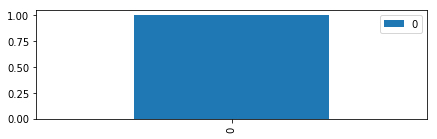

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_).plot.bar(figsize=(7,2))
plt.show()